In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

/home/viktor/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
confirmados_comuna = pd.read_csv('covid19-data/csv/confirmados_comunas.csv').replace('-',0)
print(confirmados_comuna.shape)
confirmados_comuna.head()

(346, 14)


,codigo_region,region,codigo_comuna,comuna,03/30/2020,04/01/2020,04/03/2020,04/06/2020,04/08/2020,04/10/2020,04/13/2020,04/15/2020,04/17/2020,04/20/2020
0,15,Arica y Parinacota,15101,Arica,6,6,12,41,63,87,115,124,134,166
1,15,Arica y Parinacota,15102,Camarones,0,0,0,0,0,0,0,0,0,0
2,15,Arica y Parinacota,15202,General Lagos,0,0,0,0,0,0,0,0,0,0
3,15,Arica y Parinacota,15201,Putre,0,0,0,0,0,0,0,0,0,0
4,1,Tarapacá,1107,Alto Hospicio,0,1,3,5,6,10,14,15,16,27


In [3]:
pob_comuna = pd.read_csv('pob_comuna_censo2017.csv')
print(pob_comuna.shape)
pob_comuna.head(5)

(346, 9)


,region,codigo_region,provincia,codigo_provincia,comuna,codigo_comuna,hombres,mujeres,total
0,ARICA Y PARINACOTA,15,ARICA,151,ARICA,15101,109389,111975,221364
1,ARICA Y PARINACOTA,15,ARICA,151,CAMARONES,15102,726,529,1255
2,ARICA Y PARINACOTA,15,PARINACOTA,152,PUTRE,15201,2054,711,2765
3,ARICA Y PARINACOTA,15,PARINACOTA,152,GENERAL LAGOS,15202,412,272,684
4,TARAPACÁ,1,IQUIQUE,11,IQUIQUE,1101,94897,96571,191468


In [4]:
RM = confirmados_comuna[confirmados_comuna.region=='Metropolitana']
RM_data = RM.iloc[:,2:].set_index('comuna').astype(np.int)
print(RM_data.shape)
RM_data.head()

(52, 11)


,codigo_comuna,03/30/2020,04/01/2020,04/03/2020,04/06/2020,04/08/2020,04/10/2020,04/13/2020,04/15/2020,04/17/2020,04/20/2020
comuna,,,,,,,,,,,
Alhué,13502,0,0,0,0,0,0,0,0,0,0
Buin,13402,7,8,14,20,20,29,36,40,43,47
Calera de Tango,13403,6,7,7,7,8,8,10,10,11,14
Cerrillos,13102,0,4,4,5,11,21,29,39,48,53
Cerro Navia,13103,19,21,26,31,36,42,57,65,79,99


In [5]:
RM_data_norm = RM.merge(pob_comuna[['codigo_comuna', 'total']], on='codigo_comuna').iloc[:,2:].set_index('comuna').astype(np.int)
for index, row in RM_data_norm.iterrows():
    # Cada 10 mil habitantes
    RM_data_norm.loc[index] = row/row['total']*10000
RM_data_norm = RM_data_norm.drop(columns=['total'])
RM_data_norm.codigo_comuna = RM_data.codigo_comuna
print(RM_data_norm.shape)
RM_data_norm.head()

(52, 11)


,codigo_comuna,03/30/2020,04/01/2020,04/03/2020,04/06/2020,04/08/2020,04/10/2020,04/13/2020,04/15/2020,04/17/2020,04/20/2020
comuna,,,,,,,,,,,
Alhué,13502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Buin,13402,0.724533,0.828037,1.449065,2.070093,2.070093,3.001635,3.726168,4.140187,4.450701,4.864719
Calera de Tango,13403,2.362949,2.756774,2.756774,2.756774,3.150599,3.150599,3.938248,3.938248,4.332073,5.513548
Cerrillos,13102,0.000000,0.494854,0.494854,0.618567,1.360847,2.597981,3.587688,4.824822,5.938242,6.556809
Cerro Navia,13103,1.432643,1.583448,1.960459,2.337470,2.714482,3.166895,4.297929,4.901148,5.956779,7.464825


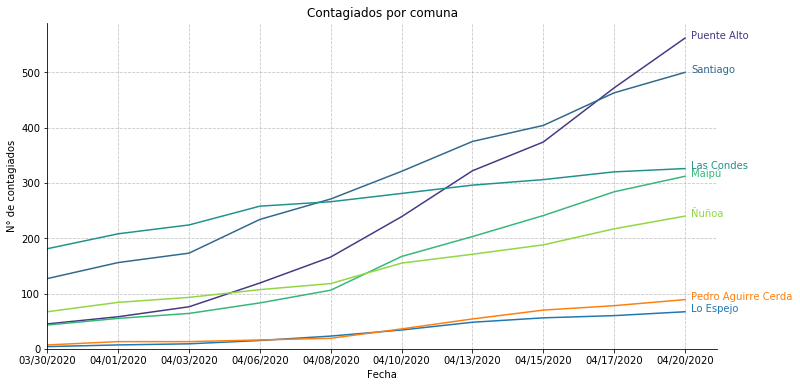

In [6]:
df = RM_data.drop(columns=['codigo_comuna'])

_, ax = plt.subplots(figsize=(12,6))
# Ploteo top 5
top = df.sort_values(df.columns[-1], ascending=False)[:5]
sns.lineplot(data=top.T, dashes=False, legend=False, ax = ax, palette='viridis')


# Ploteo por comunas en particular
particular = df.loc[['Lo Espejo', 'Pedro Aguirre Cerda']]
sns.lineplot(data=particular.T, dashes=False, legend=False, ax = ax)

#Agrego texto al final
for i, var in enumerate(top[df.columns[-1]]):
    plt.annotate(top.index.values[i], xy=(0.95, var), xytext=(8, 0), color=ax.get_lines()[i].get_color(),
                xycoords=('axes fraction', 'data'), textcoords='offset points')
    
for j, var in enumerate(particular[df.columns[-1]]):
    plt.annotate(particular.index.values[j], xy=(0.95, var), xytext=(8, 0), color=ax.get_lines()[i+j+1].get_color(),
                    xycoords=('axes fraction', 'data'), textcoords='offset points')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='both', alpha=0.7, linestyle='--')
plt.ylim(0)
plt.xlim(0)
plt.title("Contagiados por comuna")
plt.xlabel("Fecha")
plt.ylabel("N° de contagiados")
plt.savefig('output_RM/top_5.png')

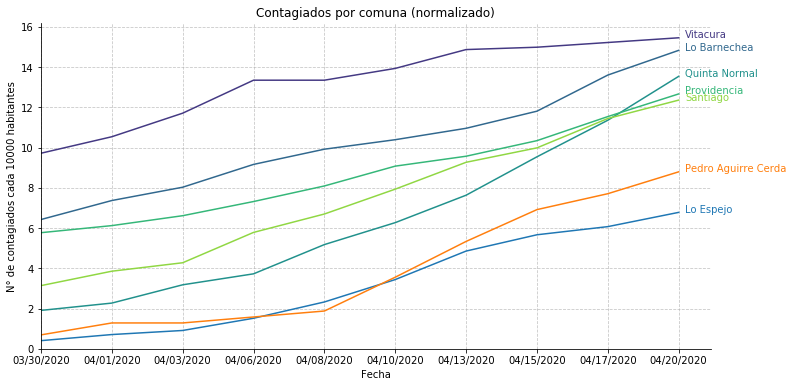

In [7]:
df = RM_data_norm.drop(columns=['codigo_comuna'])

_, ax = plt.subplots(figsize=(12,6))
# Ploteo top 5
top = df.sort_values(df.columns[-1], ascending=False)[:5]
sns.lineplot(data=top.T, dashes=False, legend=False, ax = ax, palette='viridis')


# Ploteo por comunas en particular
particular = df.loc[['Lo Espejo', 'Pedro Aguirre Cerda']]
sns.lineplot(data=particular.T, dashes=False, legend=False, ax = ax)

#Agrego texto al final
for i, var in enumerate(top[df.columns[-1]]):
    plt.annotate(top.index.values[i], xy=(0.95, var), xytext=(8, 0), color=ax.get_lines()[i].get_color(),
                xycoords=('axes fraction', 'data'), textcoords='offset points')
    
for j, var in enumerate(particular[df.columns[-1]]):
    plt.annotate(particular.index.values[j], xy=(0.95, var), xytext=(8, 0), color=ax.get_lines()[i+j+1].get_color(),
                    xycoords=('axes fraction', 'data'), textcoords='offset points')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='both', alpha=0.7, linestyle='--')
plt.ylim(0)
plt.xlim(0)
plt.title("Contagiados por comuna (normalizado)")
plt.xlabel("Fecha")
plt.ylabel("N° de contagiados cada 10000 habitantes")
plt.savefig('output_RM/top_5_norm.png')

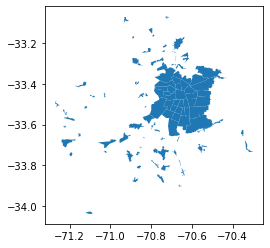

In [8]:
RM_map = gpd.read_file('uddvis/maps/R13/LIMITE_URBANO_CENSAL_C17.shp')
RM_map['COMUNA'] = RM_map['COMUNA'].astype(np.int)
RM_map.plot()

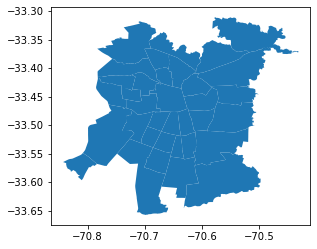

In [9]:
RM_map = RM_map.set_index('COMUNA')
# Descarto algunas zonas
RM_map2 = RM_map[RM_map.NOM_CATEG=='CIUDAD']
RM_map = RM_map2[~RM_map2.NOM_COMUNA.isin(['CURACAVÍ', 'TILTIL', 'SAN JOSÉ DE MAIPO', 'PIRQUE', 'EL MONTE','TALAGANTE','MELIPILLA', 'LAMPA', 'COLINA', 'CALERA DE TANGO', 'PEÑAFLOR',  'BUIN', 'ISLA DE MAIPO', 'PAINE'])]#rm_map[rm_map.NOM_COMUNA==rm_map.URBANO]
RM_map = RM_map[~RM_map.URBANO.isin(['CIUDAD DEL VALLE'])]
RM_map.plot()

In [13]:
RM_map_data = RM_map[['NOM_COMUNA','geometry']].join(RM_data.set_index('codigo_comuna'), how='inner')
date_columns = RM_map_data.columns.drop(['NOM_COMUNA','geometry'])

for date in date_columns:
    fig, ax = plt.subplots(figsize=(10,10))
    RM_map_data.plot(column=date, ax=ax, cmap='YlOrRd', legend=False,  vmin=0, vmax=RM_map_data[date_columns[-1]].max())
    ax.set_axis_off()
    plt.title("{} , {} casos\nSin normalizar".format(date, RM_data[date].sum()))
    cbar = plt.colorbar(ax.collections[0], fraction=0.03, pad=0)
    cbar.ax.set_ylabel("n° de contagiados") 
    #for idx, row in rm_map_points.iterrows():
    #    plt.annotate(s="{}".format(row[date]), xy=(row.geometry.centroid.x, row.geometry.centroid.y), alpha=0.6, horizontalalignment='center', size=16)
    plt.savefig('output_RM/mapa_' + date.replace('/','')+'_simple.png')
    
    #Mostrar solo grafico final
    if date==date_columns[-1]:
        plt.show()
    else:
        plt.close()

NameError: name 'RM_map' is not defined

In [12]:
# Caso Normalizado
RM_map_data = RM_map[['NOM_COMUNA','geometry']].join(RM_data_norm.set_index('codigo_comuna'), how='inner')
date_columns = RM_map_data.columns.drop(['NOM_COMUNA','geometry'])

for date in date_columns:
    fig, ax = plt.subplots(figsize=(10,10))
    RM_map_data.plot(column=date, ax=ax, cmap='YlOrRd', legend=False,  vmin=0, vmax=RM_map_data[date_columns[-1]].max())
    ax.set_axis_off()
    plt.title("{} , {} casos\nNormalizado".format(date, RM_data[date].sum()))
    cbar = plt.colorbar(ax.collections[0], fraction=0.03, pad=0)
    cbar.ax.set_ylabel("n° de contagiados\n cada 10000 habitantes") 
    #for idx, row in rm_map_points.iterrows():
    #    plt.annotate(s="{}".format(row[date]), xy=(row.geometry.centroid.x, row.geometry.centroid.y), alpha=0.6, horizontalalignment='center', size=16)
    plt.savefig('output_RM/mapa_' + date.replace('/','')+'_norm.png')
    
    #Mostrar solo grafico final
    if date==date_columns[-1]:
        plt.show()
    else:
        plt.close()

NameError: name 'RM_map' is not defined

In [40]:
last_file='mapa_'+date_columns[-1].replace('/','')

# Creo gif de mapas 
# Ultimo fotograma debería durar mas
for i in range(3):
    !cp output_RM/{last_file}_simple.png output_RM/{last_file+'_'+str(i+1)}_simple.png
!convert -delay 30 -loop 0 output_RM/mapa*simple.png output_RM/mapa_contagiados.gif
for i in range(3):
    !rm output_RM/{last_file+'_'+str(i+1)}_simple.png
    
# Creo gif de mapas normalizados
for i in range(3):
    !cp output_RM/{last_file}_norm.png output_RM/{last_file+'_'+str(i+1)}_norm.png
!convert -delay 30 -loop 0 output_RM/mapa*norm.png output_RM/mapa_contagiados_norm.gif
for i in range(3):
    !rm output_RM/{last_file+'_'+str(i+1)}_norm.png

In [11]:
from IPython.display import HTML
HTML('<img style="max-width: 500px; height: auto;" align=left src="output_RM/mapa_contagiados.gif">'
     + '<img style="max-width: 500px; height: auto;" align=right src="output_RM/mapa_contagiados_norm.gif">')